In [1]:
# this notebook will plot Qb against drainage area

In [2]:
# first import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load data
data = pd.read_excel('all_data.xlsx')

# check it out
# data

In [4]:
# remove rows if bedload transport rate is NaN

data_tau = data[data['Bedload xport rate, constant tau_*c (m^3/s)'].notna()]
data_tauS = data[data['Bedload xport rate, S dependent tau_*c (m^3/s)'].notna()]

# check it out
# data_tau
# data_tauS

In [5]:
# data for a one to one line
x = np.arange(1e1, 1e12, 1e10)
y = x

In [6]:
# linearly regress data
fit = np.polyfit(data_tauS['Drainage area (m^2)'], data_tauS['Bedload xport rate, S dependent tau_*c (m^3/yr)'], deg=1)
slope_fit = fit[0]
intercept = fit[1]
fit_eq = (slope_fit * np.arange(len(data_tauS['Drainage area (m^2)']))) + intercept

In [7]:
# what about polynomial regression just for fun
fit_poly = np.polyfit(data_tauS['Drainage area (m^2)'], data_tauS['Bedload xport rate, S dependent tau_*c (m^3/yr)'], 2)
a = fit_poly[0]
b = fit_poly[1]
c = fit_poly[2]
fit_equation = (a * np.square(np.arange(len(data_tauS['Drainage area (m^2)'])))) + (b * np.arange(len(data_tauS['Drainage area (m^2)']))) + c

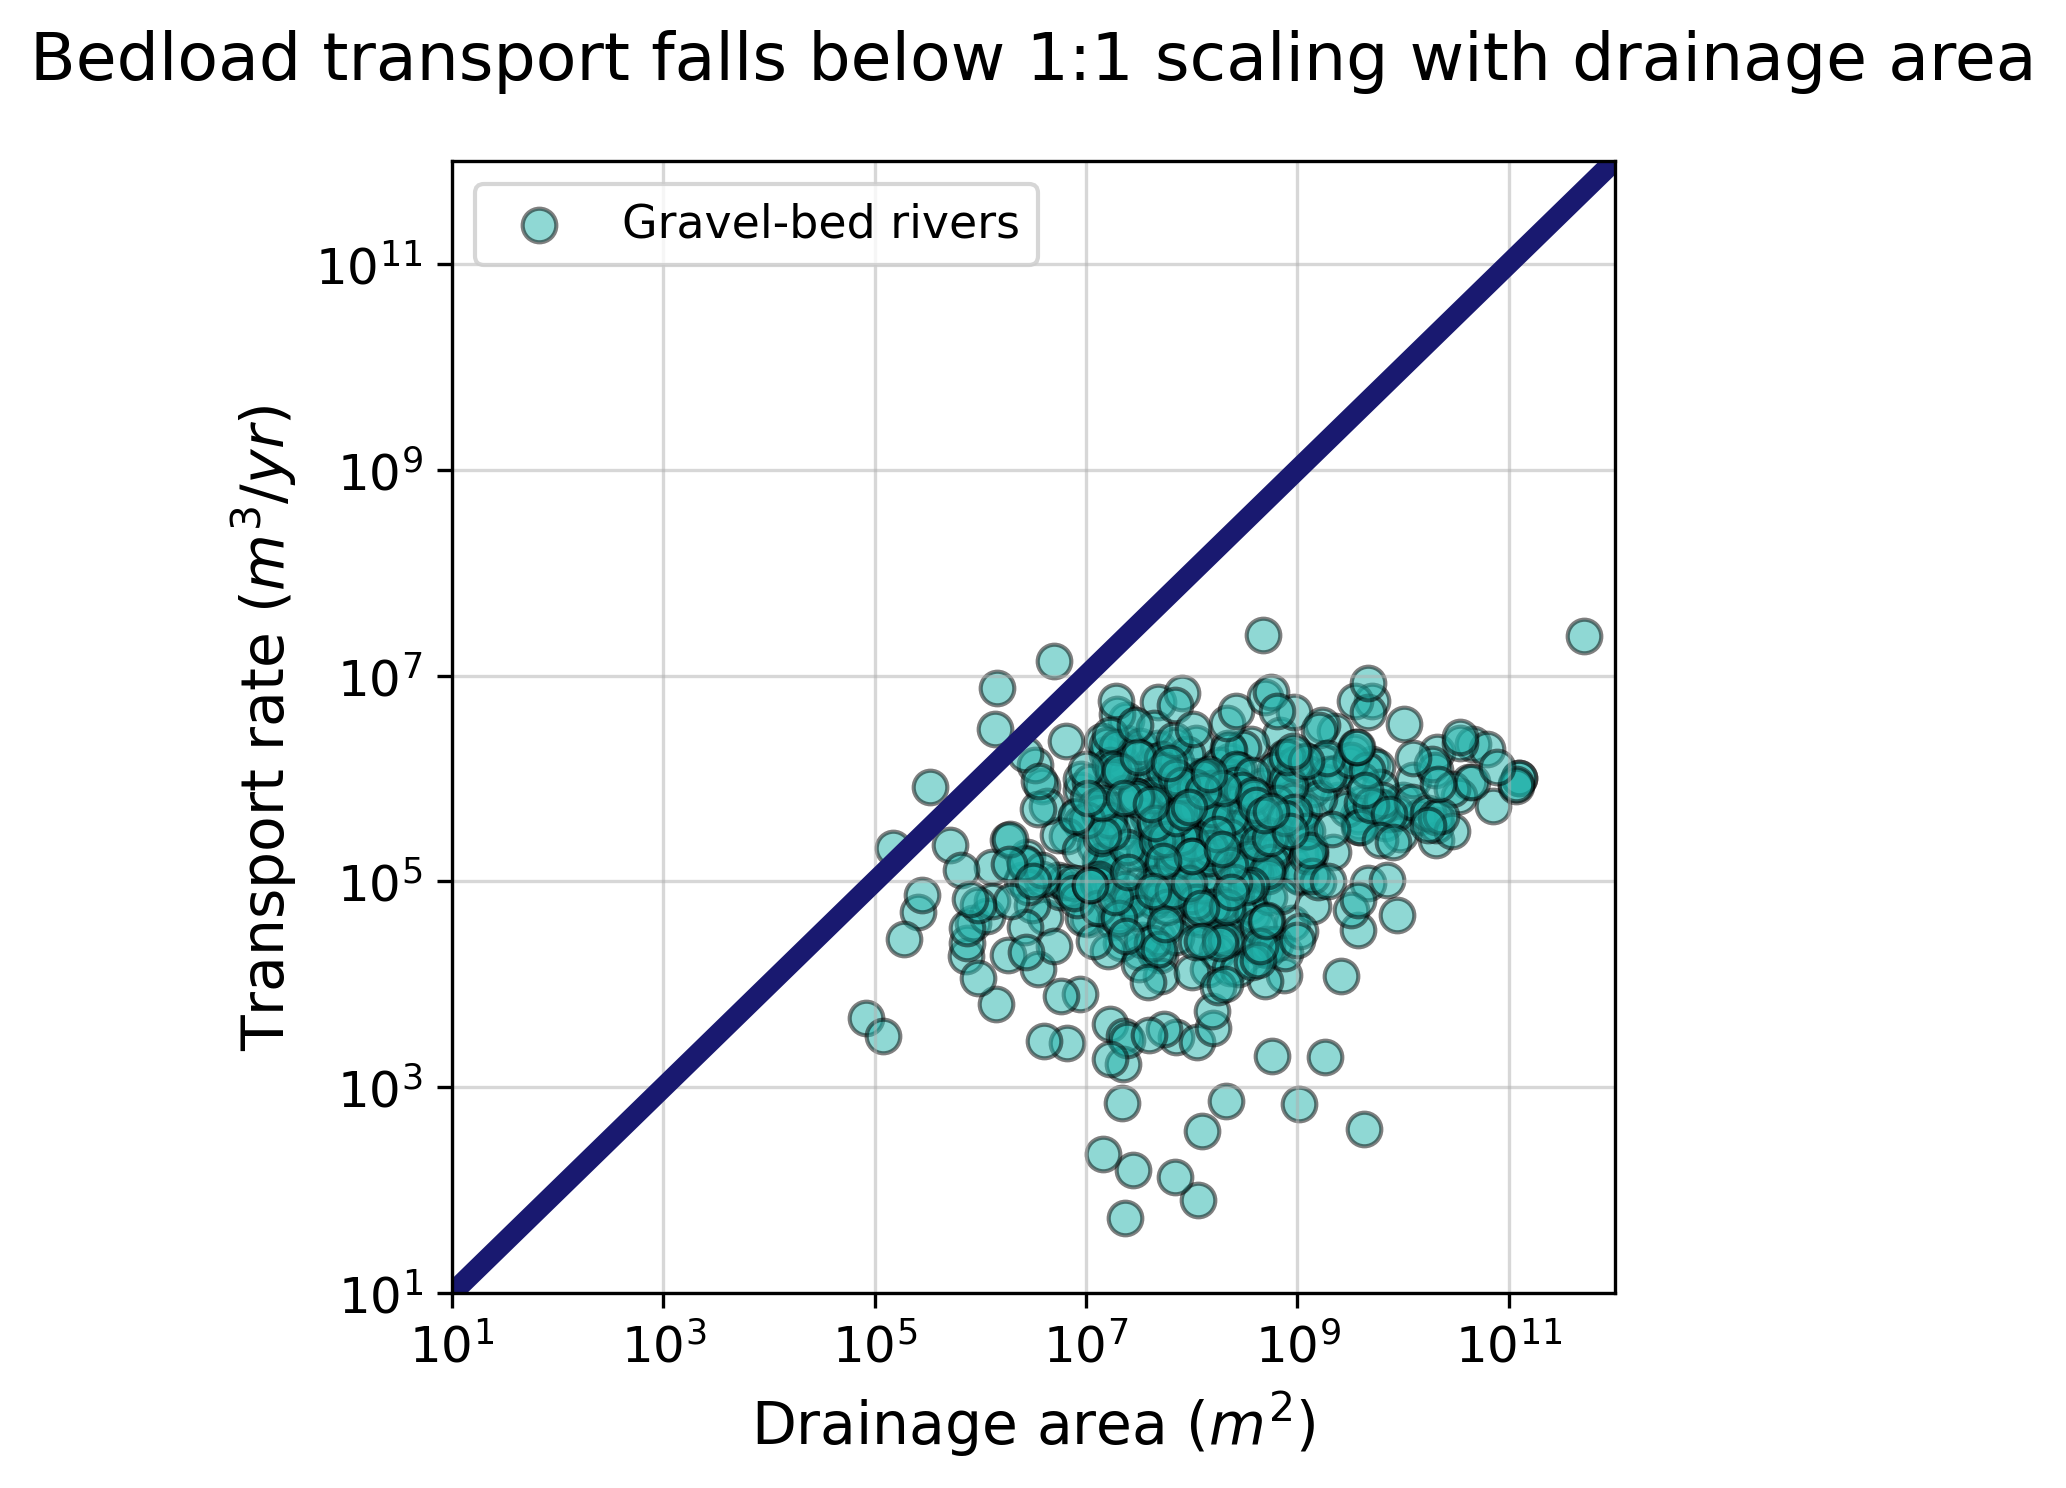

In [8]:
# Now make a figure

plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(1, figsize = (5, 5))

ax.scatter(data_tauS['Drainage area (m^2)'], data_tauS['Bedload xport rate, S dependent tau_*c (m^3/yr)'], label = 'Gravel-bed rivers', color = 'lightseagreen', alpha = 0.5, s = 65, edgecolors = 'black')
ax.plot(x, y, linewidth = 5, color = 'midnightblue')
# Plot regression line
# ax.plot(data_tauS['Drainage area (m^2)'], fit_eq, color="k", lw=2.5)
# ax.plot(data_tauS['Drainage area (m^2)'], fit_equation, color="k", lw=2.5)
ax.set_xlabel('Drainage area ($m^2$)', fontsize = 14)
ax.set_ylabel('Transport rate ($m^3/yr$)', fontsize = 14)
ax.set_title('Bedload transport falls below 1:1 scaling with drainage area', fontsize = 16, y=1.05)
ax.tick_params(axis="x", labelsize=12) 
ax.tick_params(axis="y", labelsize=12)
ax.legend(fontsize = 11)
ax.set_xlim(1e1, 1e12)
ax.set_ylim(1e1, 1e12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(alpha = 0.5)
plt.show()

In [9]:
slope_fit

3.555123195956467e-05

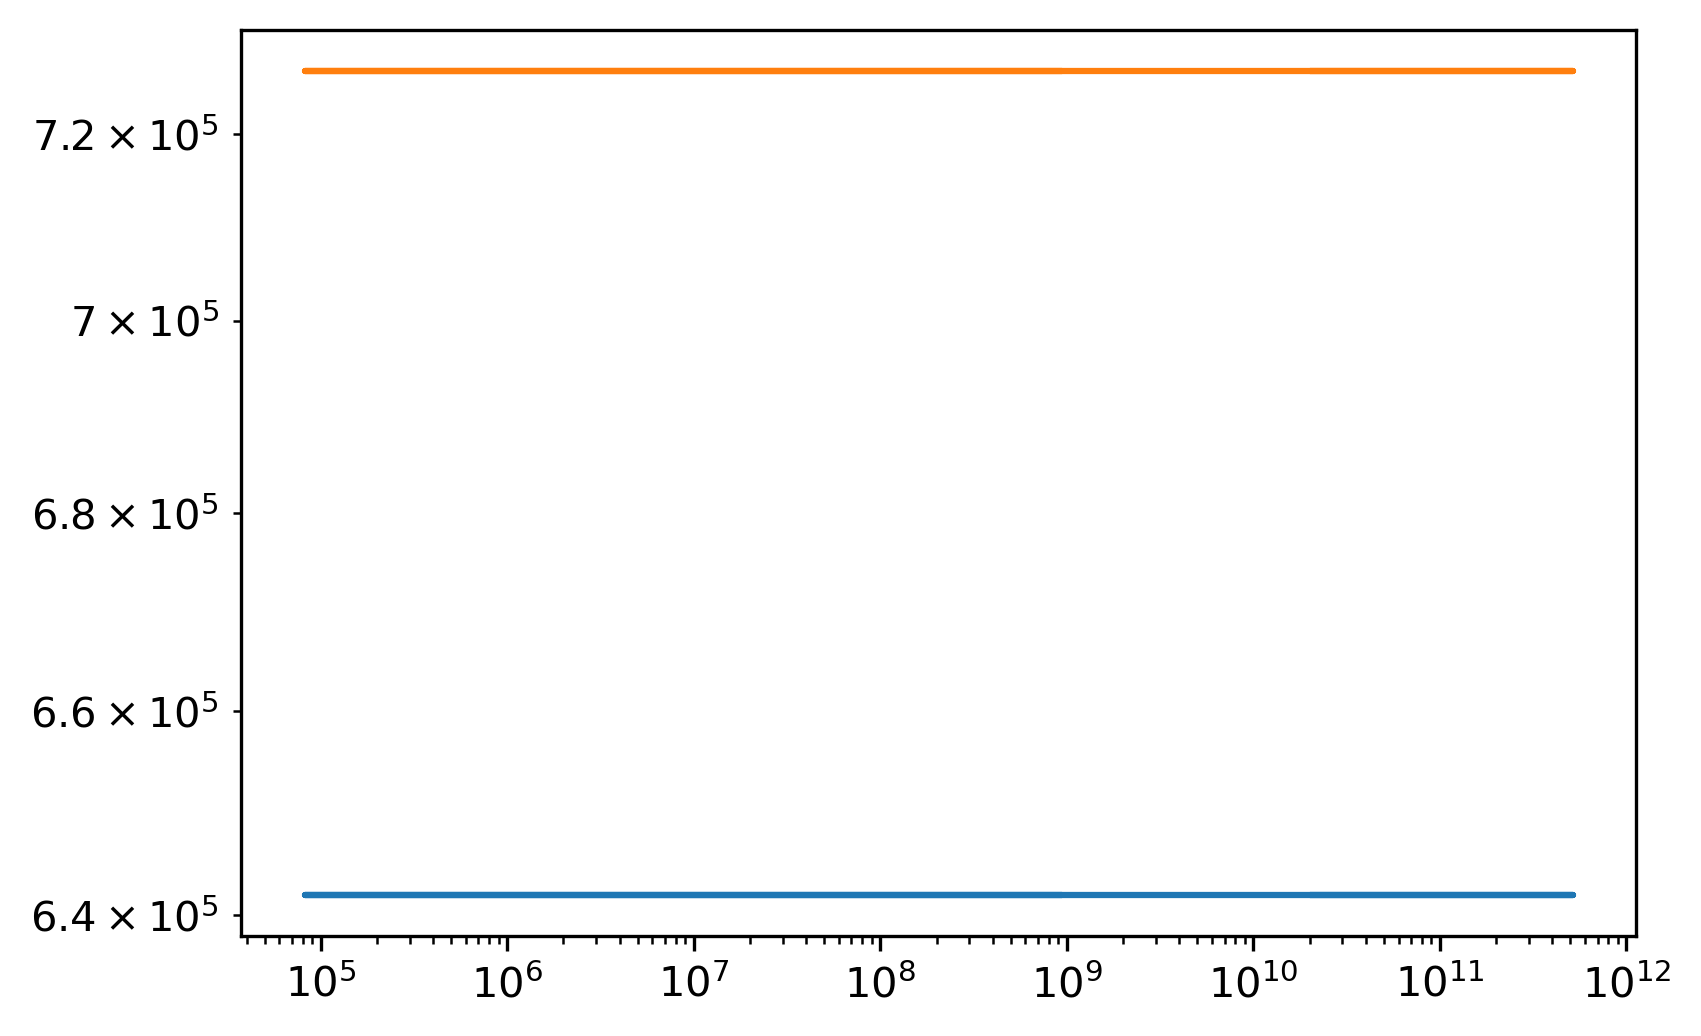

In [10]:
plt.plot(data_tauS['Drainage area (m^2)'], fit_eq)
plt.plot(data_tauS['Drainage area (m^2)'], fit_equation)
plt.xscale('log')
plt.yscale('log')